In [172]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.cluster import KMeans


user_purchase = pd.read_excel('/content/sample_data/comico_event.xlsx', sheet_name = 'user_purchase')
user_visit = pd.read_excel('/content/sample_data/comico_event.xlsx', sheet_name = 'user_visit')


**Purchase**

In [173]:
user_purchase.head()

,user_id,item_id,price,timestamp
0,u00934,item03,100.0,2020-09-30 19:11:22
1,u00934,item04,100.0,2020-09-30 19:11:22
2,u00934,item05,100.0,2020-09-30 19:11:22
3,u01865,item02,100.0,2020-09-30 20:14:21
4,u01865,item04,100.0,2020-09-30 20:14:21


In [174]:
user_purchase.describe()

,price
count,943.000000
mean,105.832450
std,23.448039
min,100.000000
25%,100.000000
50%,100.000000
75%,100.000000
max,200.000000


In [175]:
# delete row with missing values
user_purchase.isnull().sum()

user_id       0
item_id      10
price        10
timestamp    10
dtype: int64

In [176]:
user_purchase= user_purchase.dropna()

In [177]:
user_purchase.isnull().sum()

user_id      0
item_id      0
price        0
timestamp    0
dtype: int64

In [178]:
# 아이템명 바꾸기
user_purchase['item_id'] = user_purchase['item_id']. replace (['item01'],'01')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item02'],'02')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item03'],'03')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item04'],'04')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item05'],'05')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item06'],'06')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item07'],'07')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item08'],'08')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item09'],'09')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item10'],'10')

user_purchase.head()

,user_id,item_id,price,timestamp
0,u00934,03,100.0,2020-09-30 19:11:22
1,u00934,04,100.0,2020-09-30 19:11:22
2,u00934,05,100.0,2020-09-30 19:11:22
3,u01865,02,100.0,2020-09-30 20:14:21
4,u01865,04,100.0,2020-09-30 20:14:21


In [179]:
item_counts = user_purchase['item_id'].value_counts()
item_counts

03    193
05    180
01    179
02    178
04    158
06     15
10     12
08     10
09     10
07      8
Name: item_id, dtype: int64

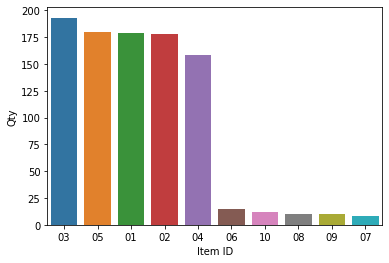

In [180]:
item_counts = user_purchase['item_id'].value_counts()
sns.barplot(x=item_counts.index, y=item_counts)
plt.xlabel('Item ID', fontsize=10)
plt.ylabel('Qty', fontsize=10)
plt.show()

In [181]:
# multi-purchase
multi_purchase = user_purchase['user_id'].value_counts() >1
multi_purchase.value_counts()

True     318
False    148
Name: user_id, dtype: int64

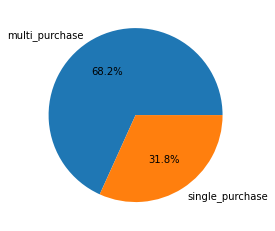

In [182]:
ratio = [318, 148]
labels = ['multi_purchase', 'single_purchase']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

**Visit**

In [183]:
user_visit.head()

,user_id,referrer,timestamp
0,u01319,search,2020-09-30 18:38:10
1,u00241,app,2020-09-30 18:52:22
2,u00633,app,2020-09-30 18:58:11
3,u00088,app,2020-09-30 18:58:17
4,u00934,search,2020-09-30 19:02:23


In [184]:
# delete row with missing values
user_visit.isnull().sum()

user_id      0
referrer     0
timestamp    0
dtype: int64

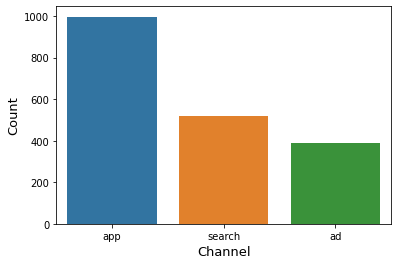

In [185]:
referrer = user_visit['referrer'].value_counts()
sns.barplot(x=referrer.index, y=referrer)
plt.xlabel('Channel', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()